In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading the Dataset

In [2]:
data_path = '../data/main_NC_Data.csv'
data_df = pd.read_csv(data_path)
data_df

,userID,modality,trainingData,auth1Data,auth2Data
0,267spXKQrOQxNGhW9Mj19RVBZnF3,AUD,"[{'block': 1, 'noiseHits': 67, 'noiseMisses': ...","[{'block': 1, 'noiseHits': 233, 'noiseMisses':...","[{'block': 1, 'noiseHits': 248, 'noiseMisses':..."
1,2IuHuexDUpgOdXCBYfDqO7ubtEC2,AUD,"[{'block': 1, 'noiseHits': 47, 'noiseMisses': ...","[{'block': 1, 'noiseHits': 211, 'noiseMisses':...","[{'block': 1, 'noiseHits': 240, 'noiseMisses':..."
2,3YKJchZqXXPUm7ouoYwzWlTp4D53,CONTROL,"[{'block': 1, 'noiseHits': 58, 'noiseMisses': ...","[{'block': 1, 'noiseHits': 266, 'noiseMisses':...","[{'block': 1, 'noiseHits': 244, 'noiseMisses':..."
3,4SQKvEIUBucwuWNoKkOVBX30H1P2,CONTROL,"[{'block': 1, 'noiseHits': 65, 'noiseMisses': ...","[{'block': 1, 'noiseHits': 258, 'noiseMisses':...","[{'block': 1, 'noiseHits': 252, 'noiseMisses':..."
4,5NToitXbnhXNNLn80hbxLBUSbfw2,VIS,"[{'block': 1, 'noiseHits': 66, 'noiseMisses': ...","[{'block': 1, 'noiseHits': 250, 'noiseMisses':...","[{'block': 1, 'noiseHits': 258, 'noiseMisses':..."
...,...,...,...,...,...
65,uEJUpBKufKO3DmepKtVcTfFT6WU2,VIS,"[{'block': 1, 'noiseHits': 74, 'noiseMisses': ...","[{'block': 1, 'noiseHits': 268, 'noiseMisses':...","[{'block': 1, 'noiseHits': 175, 'noiseMisses':..."
66,umG8DQRaeVd6RPOJfoLKNdclG8e2,CONTROL,"[{'block': 1, 'noiseHits': 66, 'noiseMisses': ...","[{'block': 1, 'noiseHits': 245, 'noiseMisses':...","[{'block': 1, 'noiseHits': 242, 'noiseMisses':..."
67,wFRIlVm6H0N0WjSBNg3EMMaTf0H3,CONTROL,"[{'block': 1, 'noiseHits': 61, 'noiseMisses': ...","[{'block': 1, 'noiseHits': 251, 'noiseMisses':...","[{'block': 1, 'noiseHits': 275, 'noiseMisses':..."
68,xTyF5REL0bUIT99Hkx2YCWC75572,AUD,"[{'block': 1, 'noiseHits': 59, 'noiseMisses': ...","[{'block': 1, 'noiseHits': 267, 'noiseMisses':...","[{'block': 1, 'noiseHits': 259, 'noiseMisses':..."


#### Manipulating the Data to make it easy to plot
We want to visualise the average hitrate (over all participants) in each block to check wheteher there is learning happening during training. So we need a new dataframe where each row is one of the 7 blocks and we have columns for average hitrate for each modality.

In [4]:
# split data_df based on modality
control_df = data_df[data_df['modality'] == 'CONTROL']
audio_df = data_df[data_df['modality'] == 'AUD']
visual_df = data_df[data_df['modality'] == 'VIS']

print("Number of participants in control group: ", len(control_df), "\nNumber of participants in audio group: ", len(audio_df), "\nNumber of participants in visual group: ", len(visual_df))

Number of participants in control group:  23 
Number of participants in audio group:  23 
Number of participants in visual group:  24


In [5]:
trainingData = list(data_df['trainingData']) # we only need training Data here
trainingData[0] # each sessionData is stored as a string of a list, we need to convert it to a list

"[{'block': 1, 'noiseHits': 67, 'noiseMisses': 23, 'passHits': 321, 'passMisses': 129}, {'block': 2, 'noiseHits': 57, 'noiseMisses': 33, 'passHits': 270, 'passMisses': 180}, {'block': 3, 'noiseHits': 71, 'noiseMisses': 19, 'passHits': 296, 'passMisses': 154}, {'block': 4, 'noiseHits': 70, 'noiseMisses': 20, 'passHits': 344, 'passMisses': 106}, {'block': 5, 'noiseHits': 66, 'noiseMisses': 24, 'passHits': 297, 'passMisses': 153}, {'block': 6, 'noiseHits': 58, 'noiseMisses': 32, 'passHits': 302, 'passMisses': 148}, {'block': 7, 'noiseHits': 61, 'noiseMisses': 29, 'passHits': 306, 'passMisses': 144}]"

In [6]:
import ast
ast.literal_eval(trainingData[0]) # this converts the string to a list!

[{'block': 1,
  'noiseHits': 67,
  'noiseMisses': 23,
  'passHits': 321,
  'passMisses': 129},
 {'block': 2,
  'noiseHits': 57,
  'noiseMisses': 33,
  'passHits': 270,
  'passMisses': 180},
 {'block': 3,
  'noiseHits': 71,
  'noiseMisses': 19,
  'passHits': 296,
  'passMisses': 154},
 {'block': 4,
  'noiseHits': 70,
  'noiseMisses': 20,
  'passHits': 344,
  'passMisses': 106},
 {'block': 5,
  'noiseHits': 66,
  'noiseMisses': 24,
  'passHits': 297,
  'passMisses': 153},
 {'block': 6,
  'noiseHits': 58,
  'noiseMisses': 32,
  'passHits': 302,
  'passMisses': 148},
 {'block': 7,
  'noiseHits': 61,
  'noiseMisses': 29,
  'passHits': 306,
  'passMisses': 144}]

In [7]:

control_train_list = []
audio_train_list = []
visual_train_list = []

for data_point in control_df['trainingData']:
    control_train_list.append(ast.literal_eval(data_point))

for data_point in audio_df['trainingData']:
    audio_train_list.append(ast.literal_eval(data_point))

for data_point in visual_df['trainingData']:
    visual_train_list.append(ast.literal_eval(data_point))

print(f'Control: {len(control_train_list)}\nAudio: {len(audio_train_list)}\nVisual: {len(visual_train_list)}')
print(control_train_list[0])

Control: 23
Audio: 23
Visual: 24
[{'block': 1, 'noiseHits': 58, 'noiseMisses': 32, 'passHits': 338, 'passMisses': 112}, {'block': 2, 'noiseHits': 51, 'noiseMisses': 39, 'passHits': 309, 'passMisses': 141}, {'block': 3, 'noiseHits': 44, 'noiseMisses': 46, 'passHits': 285, 'passMisses': 165}, {'block': 4, 'noiseHits': 67, 'noiseMisses': 23, 'passHits': 377, 'passMisses': 73}, {'block': 5, 'noiseHits': 45, 'noiseMisses': 45, 'passHits': 228, 'passMisses': 222}, {'block': 6, 'noiseHits': 52, 'noiseMisses': 38, 'passHits': 291, 'passMisses': 159}, {'block': 7, 'noiseHits': 73, 'noiseMisses': 17, 'passHits': 343, 'passMisses': 107}]


In [19]:
# get the avg blockwise HR for each modality
def get_blockwiseHR(training_list, pass_specific=False):
    blockwiseHR = []
    for block in range(1,8):
        block_HR = []
        for training_point in training_list:
            for session in training_point:
                if session['block'] == block:
                    hits = session['passHits'] + session['noiseHits']
                    misses = session['passMisses'] + session['noiseMisses']
                    block_HR.append(hits/(hits+misses))
        mean_HR = np.mean(block_HR)
        sd_HR = np.std(block_HR)
        s_error = sd_HR/np.sqrt(len(block_HR))
        res=(mean_HR,sd_HR,s_error)
        blockwiseHR.append(res)
    return blockwiseHR

In [23]:
control_train_blockwiseHR = get_blockwiseHR(control_train_list)
audio_train_blockwiseHR = get_blockwiseHR(audio_train_list)
visual_train_blockwiseHR = get_blockwiseHR(visual_train_list)

print(control_train_blockwiseHR)
print(audio_train_blockwiseHR)
print(visual_train_blockwiseHR)

[(0.7066022544283415, 0.05853733489182782, 0.012205878085432238), (0.7247181964573268, 0.09847287559113922, 0.020533013954401616), (0.7479066022544282, 0.11079302880171146, 0.023101943482197476), (0.7651368760064414, 0.12687157030696022, 0.026454551143056778), (0.6971819645732691, 0.13018041438336755, 0.027144492826855077), (0.7252012882447666, 0.13447549262696346, 0.028040078550147764), (0.7832528180354268, 0.08733798360115823, 0.018211228475521913)]
[(0.6822866344605475, 0.10339242748787124, 0.021558811435572065), (0.7188405797101448, 0.10033291659954187, 0.020920859315390825), (0.7484702093397746, 0.11665024572460915, 0.02432325763688067), (0.7857487922705314, 0.09994844914262944, 0.020840692308888718), (0.730354267310789, 0.11167161248028112, 0.023285140843134537), (0.725925925925926, 0.13251110766347746, 0.027630475970503953), (0.7801127214170692, 0.10407143421518358, 0.02170039412545841)]
[(0.6866512345679011, 0.044540723797851775, 0.009091837173248045), (0.679783950617284, 0.097

7

#### Populating ```plot_df```

In [24]:
plot_df = pd.DataFrame(index=np.arange(1,8), columns=['control_mean_HR', 'control_sd_HR', 'control_s_error', 'audio_mean_HR', 'audio_sd_HR', 'audio_s_error', 'visual_mean_HR', 'visual_sd_HR', 'visual_s_error'])

plot_df

,control_mean_HR,control_sd_HR,control_s_error,audio_mean_HR,audio_sd_HR,audio_s_error,visual_mean_HR,visual_sd_HR,visual_s_error
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
plot_df['control_mean_HR'] = [control_train_blockwiseHR[i][0] for i in range(7)]
plot_df['control_sd_HR'] = [control_train_blockwiseHR[i][1] for i in range(7)]
plot_df['control_s_error'] = [control_train_blockwiseHR[i][2] for i in range(7)]

plot_df['audio_mean_HR'] = [audio_train_blockwiseHR[i][0] for i in range(7)]
plot_df['audio_sd_HR'] = [audio_train_blockwiseHR[i][1] for i in range(7)]
plot_df['audio_s_error'] = [audio_train_blockwiseHR[i][2] for i in range(7)]

plot_df['visual_mean_HR'] = [visual_train_blockwiseHR[i][0] for i in range(7)]
plot_df['visual_sd_HR'] = [visual_train_blockwiseHR[i][1] for i in range(7)]
plot_df['visual_s_error'] = [visual_train_blockwiseHR[i][2] for i in range(7)]
plot_df

,control_mean_HR,control_sd_HR,control_s_error,audio_mean_HR,audio_sd_HR,audio_s_error,visual_mean_HR,visual_sd_HR,visual_s_error
1,0.706602,0.058537,0.012206,0.682287,0.103392,0.021559,0.686651,0.044541,0.009092
2,0.724718,0.098473,0.020533,0.718841,0.100333,0.020921,0.679784,0.097747,0.019952
3,0.747907,0.110793,0.023102,0.748470,0.116650,0.024323,0.721451,0.083890,0.017124
4,0.765137,0.126872,0.026455,0.785749,0.099948,0.020841,0.731790,0.093863,0.019160
5,0.697182,0.130180,0.027144,0.730354,0.111672,0.023285,0.729552,0.119645,0.024422
6,0.725201,0.134475,0.028040,0.725926,0.132511,0.027630,0.745679,0.092549,0.018891
7,0.783253,0.087338,0.018211,0.780113,0.104071,0.021700,0.757330,0.087666,0.017895


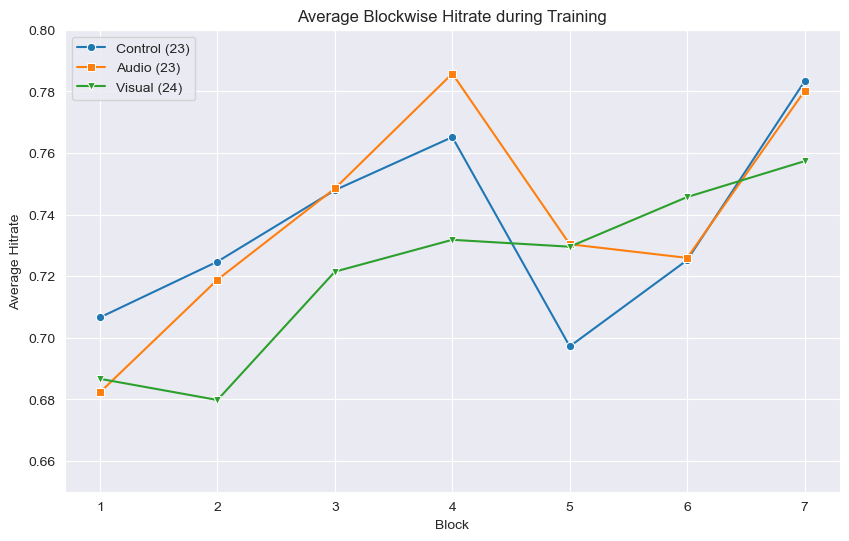

In [40]:
# plot the blockwise HR for each modality with seaborn as a lineplot no grid
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
# sns.lineplot(data=plot_df, markers=True, dashes=False)
ax = sns.lineplot(plot_df['control_mean_HR'], marker='o', label='Control (23)')
sns.lineplot(plot_df['audio_mean_HR'], marker='s', label='Audio (23)')
sns.lineplot(plot_df['visual_mean_HR'], marker="v", label='Visual (24)')

# plt.legend(labels=['Control', 'Audio', 'Visual'])
plt.ylim(0.65,0.8)
plt.title('Average Blockwise Hitrate during Training')
plt.xlabel('Block')
plt.ylabel('Average Hitrate')
# set legend

plt.show()


<AxesSubplot: ylabel='visual_mean_HR'>

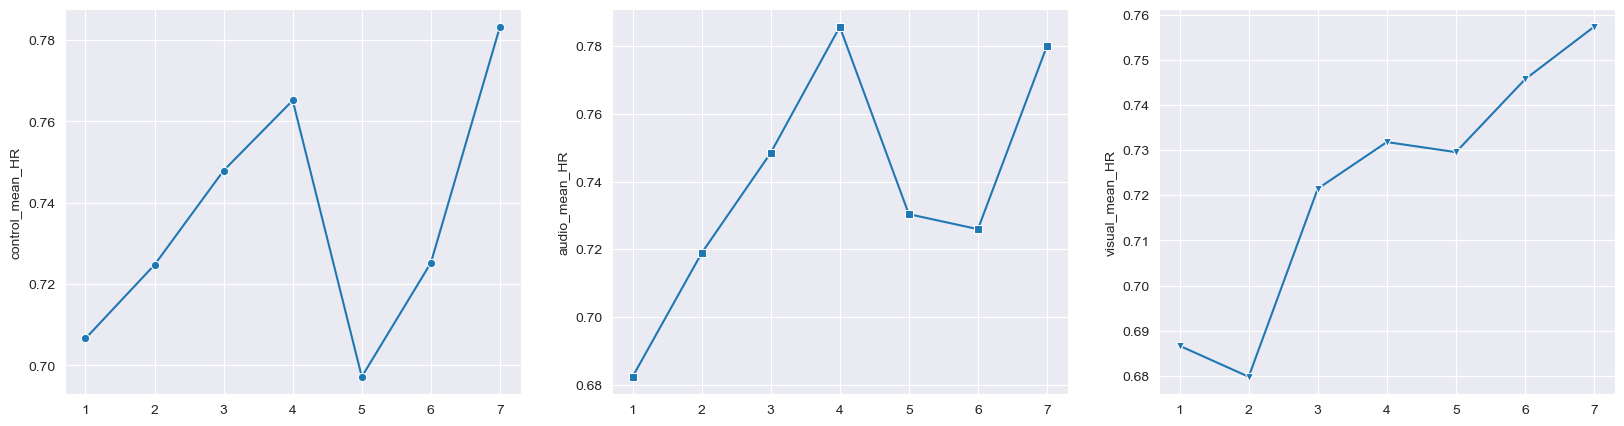

In [41]:
# 1x3 subplot with blockwise HR for each modality
fig, axs = plt.subplots(1,3, figsize=(20,5))
sns.set_style("darkgrid")
sns.lineplot(plot_df['control_mean_HR'], marker='o', ax=axs[0])
sns.lineplot(plot_df['audio_mean_HR'], marker='s', ax=axs[1])
sns.lineplot(plot_df['visual_mean_HR'], marker="v", ax=axs[2])

axs[0].set_title('Control')
axs[0].set_xlabel('Training Block')

axs[1].set_title('Audio')
axs[1].set_xlabel('Training Block')

axs[2].set_title('Visual')
axs[2].set_xlabel('Training Block')




#### Separating Pass and Noise

In [13]:
plot_df2 = pd.DataFrame(index=np.arange(1,8), columns=['control_p_HR', 'audio_p_HR', 'visual_p_HR', 'control_t_HR', 'audio_t_HR', 'visual_t_HR', 'control_n_HR', 'audio_n_HR', 'visual_n_HR'])
plot_df2

,control_p_HR,audio_p_HR,visual_p_HR,control_t_HR,audio_t_HR,visual_t_HR,control_n_HR,audio_n_HR,visual_n_HR
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
def get_blockwiseHR_pn(training_list):
    blockwiseHR_p = []
    blockwiseHR_n = []
    for block in range(1,8):
        block_HR_p = []
        block_HR_n = []
        for training_point in training_list:
            for session in training_point:
                if session['block'] == block:
                    hits_p = session['passHits']
                    misses_p = session['passMisses']
                    hits_n = session['noiseHits']
                    misses_n = session['noiseMisses']
                    block_HR_p.append(hits_p/(hits_p+misses_p))
                    block_HR_n.append(hits_n/(hits_n+misses_n))
        mean_HR_p = np.mean(block_HR_p)
        mean_HR_n = np.mean(block_HR_n)
        blockwiseHR_p.append(mean_HR_p)
        blockwiseHR_n.append(mean_HR_n)
    return blockwiseHR_p, blockwiseHR_n

In [15]:
control_pass_HR, control_noise_HR = get_blockwiseHR_pn(control_train_list)
audio_pass_HR, audio_noise_HR = get_blockwiseHR_pn(audio_train_list)
visual_pass_HR, visual_noise_HR = get_blockwiseHR_pn(visual_train_list)

plot_df2['control_p_HR'] = control_pass_HR
plot_df2['audio_p_HR'] = audio_pass_HR
plot_df2['visual_p_HR'] = visual_pass_HR
plot_df2['control_n_HR'] = control_noise_HR
plot_df2['audio_n_HR'] = audio_noise_HR
plot_df2['visual_n_HR'] = visual_noise_HR

control_t_HR = get_blockwiseHR(control_train_list)
audio_t_HR = get_blockwiseHR(audio_train_list)
visual_t_HR = get_blockwiseHR(visual_train_list)

plot_df2['control_t_HR'] = control_t_HR
plot_df2['audio_t_HR'] = audio_t_HR
plot_df2['visual_t_HR'] = visual_t_HR

plot_df2


,control_p_HR,audio_p_HR,visual_p_HR,control_t_HR,audio_t_HR,visual_t_HR,control_n_HR,audio_n_HR,visual_n_HR
1,0.710918,0.683575,0.686019,0.706602,0.682287,0.686651,0.685024,0.675845,0.689815
2,0.729855,0.719034,0.685463,0.724718,0.718841,0.679784,0.699034,0.717874,0.651389
3,0.752850,0.753720,0.729630,0.747907,0.748470,0.721451,0.723188,0.722222,0.680556
4,0.774783,0.792947,0.739352,0.765137,0.785749,0.731790,0.716908,0.749758,0.693981
5,0.707826,0.734783,0.736204,0.697182,0.730354,0.729552,0.643961,0.708213,0.696296
6,0.736039,0.733430,0.754167,0.725201,0.725926,0.745679,0.671014,0.688406,0.703241
7,0.792850,0.784541,0.769722,0.783253,0.780113,0.757330,0.735266,0.757971,0.695370


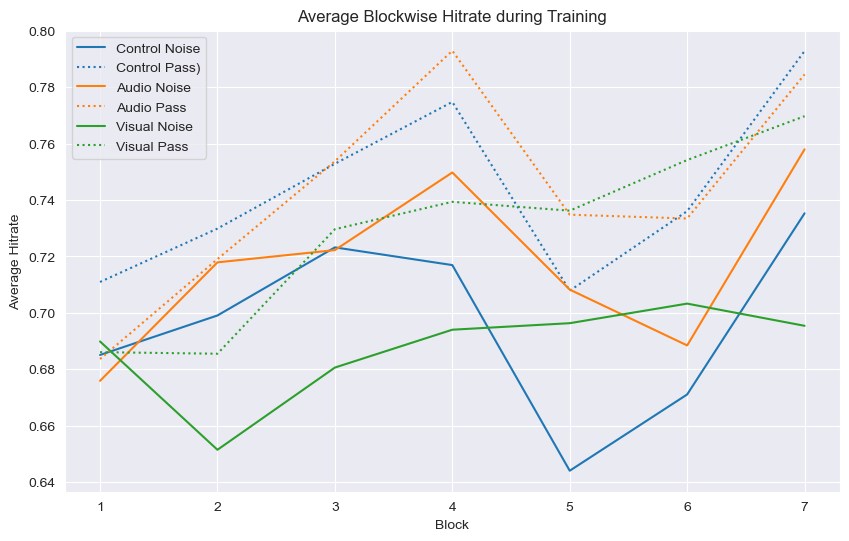

In [16]:
# plot the blockwise HR for each modality with seaborn as a lineplot no grid
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
cmap = sns.color_palette("tab10", 6)
# print(cmap)
# sns.lineplot(data=plot_df, markers=True, dashes=False)
sns.lineplot(plot_df2['control_n_HR'], label='Control Noise', color=cmap[0])
sns.lineplot(plot_df2['control_p_HR'], label='Control Pass)', color=cmap[0], linestyle='dotted')

sns.lineplot(plot_df2['audio_n_HR'], label='Audio Noise', color=cmap[1])
sns.lineplot(plot_df2['audio_p_HR'], label='Audio Pass', color=cmap[1], linestyle='dotted')

sns.lineplot(plot_df2['visual_n_HR'], label='Visual Noise', color=cmap[2])
sns.lineplot(plot_df2['visual_p_HR'], label='Visual Pass', color=cmap[2], linestyle='dotted')


# plt.legend(labels=['Control', 'Audio', 'Visual'])
# plt.ylim(0.65,0.8)
plt.title('Average Blockwise Hitrate during Training')
plt.xlabel('Block')
plt.ylabel('Average Hitrate')
# set legend

plt.show()


In [17]:
plot_df3 = pd.DataFrame(index=np.arange(1,8), columns=['total', 'pass', 'noise'])
plot_df3['total'] = (plot_df2['control_t_HR'] + plot_df2['audio_t_HR'] + plot_df2['visual_t_HR']) / 3
plot_df3['pass'] = (plot_df2['control_p_HR'] + plot_df2['audio_p_HR'] + plot_df2['visual_p_HR']) / 3
plot_df3['noise'] = (plot_df2['control_n_HR'] + plot_df2['audio_n_HR'] + plot_df2['visual_n_HR']) / 3

plot_df3

,total,pass,noise
1,0.691847,0.693504,0.683561
2,0.707781,0.711451,0.689432
3,0.739276,0.745400,0.708655
4,0.760892,0.769027,0.720216
5,0.719030,0.726271,0.682823
6,0.732269,0.741212,0.687554
7,0.773565,0.782371,0.729536


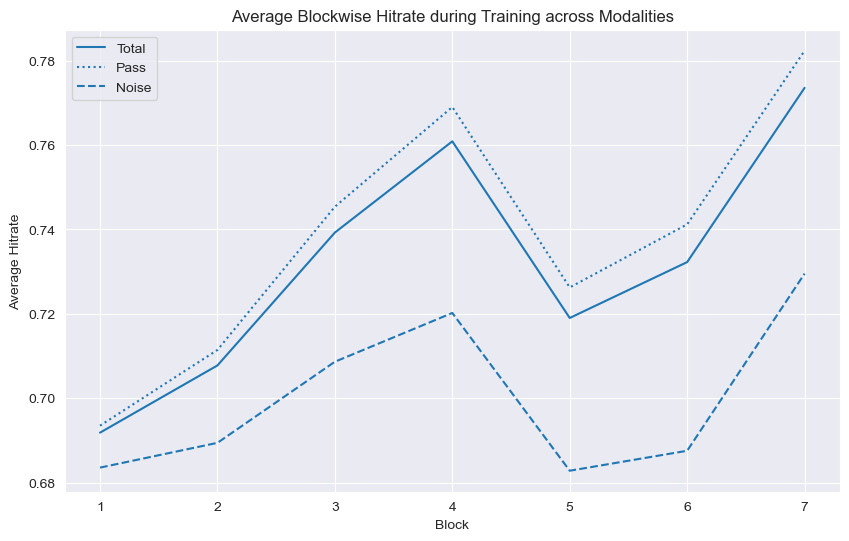

In [18]:
# plot the blockwise HR for each modality with seaborn as a lineplot no grid
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")

sns.lineplot(plot_df3['total'], label='Total', color=cmap[0])
sns.lineplot(plot_df3['pass'], label='Pass', color=cmap[0], linestyle='dotted')
sns.lineplot(plot_df3['noise'], label='Noise', color=cmap[0], linestyle='dashed')

plt.title('Average Blockwise Hitrate during Training across Modalities')
plt.xlabel('Block')
plt.ylabel('Average Hitrate')
plt.show()
